In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta

Path = 'K:\CPDiary\Data\BaxtersMVI\Soil data'

In [2]:
Layout = pd.read_excel('K:\CPDiary\Data\BaxtersMVI\TrialLayout.xlsx',index_col='Plot')

In [3]:
FieldData = pd.read_excel(Path+'\Baxters MVI soil content 2018.xlsx',skiprows=5,)
CleanFieldData = FieldData.drop(['Unnamed: 0','Date'],axis=1)
CleanFieldData.ix[:,'Plot'] = pd.to_numeric([CleanFieldData.ix[x,'Plot'].replace('Plot ','') for x in CleanFieldData.index])
VolumetricWC = CleanFieldData.sort_values(by=['Plot','Depth'])
VolumetricWC.set_index('Plot',inplace=True,drop=False)
PlotList = CleanFieldData.ix[:,'Plot'].drop_duplicates().values

In [4]:
VolumetricWC.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in VolumetricWC.index]
VolumetricWC.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in VolumetricWC.index]
VolumetricWC.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in VolumetricWC.index]

In [5]:
def CalcVol(BeadsWt,BeadsBD,QuadratDepth):
    AccumProfileVol = []
    LayerVol = []
    QuadVol = (400 * 400 * QuadratDepth[0])/1e6
    AccumProfileVol.append((BeadsWt[0] / BeadsBD[0]) - QuadVol)
    AccumProfileVol.append((BeadsWt[1] / BeadsBD[1]) - QuadVol)
    AccumProfileVol.append((BeadsWt[2] / BeadsBD[2]) - QuadVol)
    LayerVol.append(AccumProfileVol[0])
    LayerVol.append(AccumProfileVol[1] - AccumProfileVol[0])
    LayerVol.append(AccumProfileVol[2] - AccumProfileVol[1])
    return LayerVol

In [6]:
for plot in PlotList:
    VolumetricWC.ix[plot,'LayerVol(l)'] = CalcVol(VolumetricWC.ix[plot,'BeadsWT(kg)'].values,
                                              VolumetricWC.ix[plot,'BeadsBD(kg/l)'].values,
                                              VolumetricWC.ix[plot,'QuadratDepth(mm)'].values)

In [7]:
VolumetricWC.ix[:,'SoilDWT(kg)'] = VolumetricWC.ix[:,'FineSoilDWT(kg)'] + VolumetricWC.ix[:,'StoneDWT(g)']/1000
VolumetricWC.ix[:,'BulkDensity(g/mm3)'] = VolumetricWC.ix[:,'SoilDWT(kg)']/VolumetricWC.ix[:,'LayerVol(l)']

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


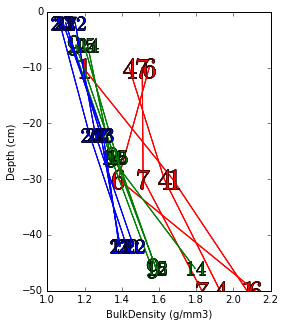

In [8]:
BDGraph, ax = plt.subplots(figsize = (4,5))
pos = 0
cols = ['r','g','b']
for ZoneID in ['Low','Mid','High']:
    for plot in VolumetricWC.ix[VolumetricWC.Zone == ZoneID,:].index:
        plt.plot(VolumetricWC.ix[plot,'BulkDensity(g/mm3)'].values,np.add([-10,-30,-50],pos*4),marker=u'$'+str(plot)+'$', color = cols[pos],ms=20)
    pos += 1
plt.ylabel('Depth (cm)')
plt.xlabel('BulkDensity (g/mm3)')
plt.legend(loc=2)

In [9]:
VolumetricWC

,Plot,WetUp,Depth,SoilFWT(kg),BeadsWT(kg),QuadratDepth(mm),FineSoilDWT(kg),StoneDWT(g),BeadsBD(kg/l),Zone,Rep,Irrig,LayerVol(l),SoilDWT(kg),BulkDensity(g/mm3)
Plot,,,,,,,,,,,,,,,
1,1,None,0-20,32.80,12.95,10,24.35,3533.0,0.518135,Low,1,STD,23.393500,27.8830,1.191912
1,1,None,20-40,37.75,23.80,10,21.15,13907.4,0.518135,Low,1,STD,20.940500,35.0574,1.674143
1,1,None,40-60,36.65,32.75,10,8.90,26922.8,0.518135,Low,1,STD,17.273500,35.8228,2.073859
4,4,Irrigated,0-20,35.50,12.64,10,23.75,5058.0,0.585000,Low,2,STD,20.006838,28.8080,1.439908
4,4,Irrigated,20-40,59.10,28.15,10,26.55,26744.0,0.518135,Low,2,STD,32.722662,53.2940,1.628657
4,4,Irrigated,40-60,70.30,46.20,10,23.55,43650.0,0.518135,Low,2,STD,34.836500,67.2000,1.929011
6,6,Irrigated,0-20,32.55,10.02,15,22.80,3417.0,0.518135,Low,3,STD,16.938600,26.2170,1.547767
6,6,Irrigated,20-40,31.55,20.60,15,17.10,11100.0,0.518135,Low,3,STD,20.419400,28.2000,1.381040
6,6,Irrigated,40-60,38.60,29.65,15,15.05,21918.9,0.518135,Low,3,STD,17.466500,36.9689,2.116560


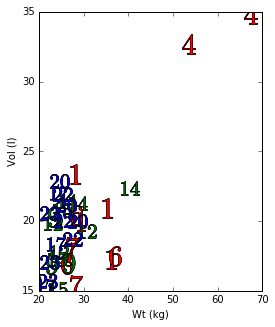

In [10]:
BDGraph, ax = plt.subplots(figsize = (4,5))
pos = 0
cols = ['r','g','b']
for ZoneID in ['Low','Mid','High']:
    for plot in VolumetricWC.ix[VolumetricWC.Zone == ZoneID,:].index:
        plt.plot(VolumetricWC.ix[plot,'SoilDWT(kg)'].values,VolumetricWC.ix[plot,'LayerVol(l)'].values,marker=u'$'+str(plot)+'$', color = cols[pos],ms=20,ls='None')
    pos += 1
plt.ylabel('Vol (l)')
plt.xlabel('Wt (kg)')
plt.legend(loc=2)

In [11]:
VolumetricWC.ix[:,'Water(kg)'] = VolumetricWC.ix[:,'SoilFWT(kg)']-VolumetricWC.ix[:,'SoilDWT(kg)']  
VolumetricWC.ix[:,'GravometricWC(%)'] = VolumetricWC.ix[:,'Water(kg)']/VolumetricWC.ix[:,'SoilDWT(kg)']
VolumetricWC.ix[:,'VolumetricWC(mm/mm)'] = VolumetricWC.ix[:,'GravometricWC(%)'] * VolumetricWC.ix[:,'BulkDensity(g/mm3)']

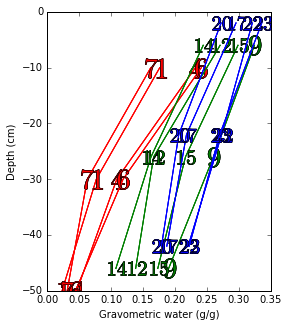

In [12]:
BDGraph, ax = plt.subplots(figsize = (4,5))
pos = 0
cols = ['r','g','b']
for ZoneID in ['Low','Mid','High']:
    for plot in VolumetricWC.ix[VolumetricWC.Zone == ZoneID,:].index:
        plt.plot(VolumetricWC.ix[plot,'GravometricWC(%)'].values,np.add([-10,-30,-50],pos*4),marker=u'$'+str(plot)+'$', color = cols[pos],ms=20)
    pos += 1
plt.ylabel('Depth (cm)')
plt.xlabel('Gravometric water (g/g)')
plt.legend(loc=2)

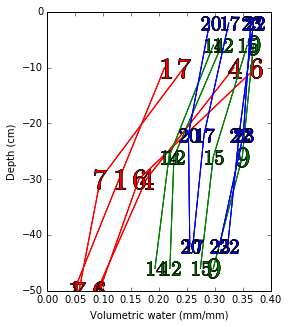

In [13]:
BDGraph, ax = plt.subplots(figsize = (4,5))
pos = 0
cols = ['r','g','b']
for ZoneID in ['Low','Mid','High']:
    for plot in VolumetricWC.ix[VolumetricWC.Zone == ZoneID,:].index:
        plt.plot(VolumetricWC.ix[plot,'VolumetricWC(mm/mm)'].values,np.add([-10,-30,-50],pos*4),marker=u'$'+str(plot)+'$', color = cols[pos],ms=20)
    pos += 1
plt.ylabel('Depth (cm)')
plt.xlabel('Volumetric water (mm/mm)')
plt.legend(loc=2)

In [15]:
#Set up blank dataframe to take data
ColumnLables = ['Plot','Date','40-60','20-40']
TabIndex = pd.MultiIndex.from_arrays([[],[]],names=['Plot','Date'])
SoilWaterData = pd.DataFrame(columns=ColumnLables[2:],index = TabIndex)
#Read in file and find which lines have legit data
HeaderRowsToSkip = 29
DataTab = pd.read_csv('K:\CPDiary\Data\BaxtersMVI\Soil moisture data\CalibrationMeasurements\MV180213.NP2',skiprows = range(HeaderRowsToSkip),header=None,delim_whitespace=True)
DataTab.dropna(inplace=True)
DataTab.drop([0,1,3,5],axis=1,inplace=True)
DataTab.columns = ColumnLables
DataTab.ix[:,1] = pd.to_datetime(DataTab.ix[:,1],format='%m/%d/%y')
SoilWaterData = SoilWaterData.append(DataTab)
SoilWaterData.ix[:,'Plot'] = np.int64(SoilWaterData.ix[:,'Plot'] )
SoilWaterData = SoilWaterData.where(SoilWaterData.ix[:,'Plot']<25).dropna()
SoilWaterData.ix[:,'Zone'] = [Layout.ix[int(x),'Zone'] for x in SoilWaterData.Plot]
SoilWaterData.ix[:,'Irrig'] = [Layout.ix[int(x),'Irrig'] for x in SoilWaterData.Plot]
SoilWaterData.ix[:,'Rep'] = [Layout.ix[int(x),'Rep'] for x in SoilWaterData.Plot]
SoilWaterData.set_index(['Plot','Date'],inplace=True,drop=False)

#Add in the TDR Data
SoilWaterData.ix[:,'0-20'] = np.nan
TDRData = pd.read_csv('K:\CPDiary\Data\BaxtersMVI\Soil moisture data\CalibrationMeasurements\MV180213.TDR',header=None).ix[:,[2,11,3]]
TDRData.columns = ['Plot','Date','0-20']
TDRData = TDRData.drop_duplicates(subset=['Plot','Date'])
TDRData.ix[:,'Date'] = pd.to_datetime(TDRData.ix[:,'Date'], format = '%d%b%Y')
TDRData.set_index(['Plot','Date'],inplace=True)
SoilWaterData.update(TDRData)
SoilWaterData.index = SoilWaterData.index.droplevel(level=1)

In [16]:
SoilWaterData

,20-40,40-60,Date,Plot,Zone,Irrig,Rep,0-20
Plot,,,,,,,,
7,6.1,4.0,2018-02-12,7,Low,STD,4,13.5
4,17.5,10.3,2018-02-12,4,Low,STD,2,27.2
6,19.3,10.0,2018-02-12,6,Low,STD,3,26.0
1,14.6,6.7,2018-02-12,1,Low,STD,1,26.8
9,36.4,35.2,2018-02-12,9,Mid,STD,1,32.4
14,27.7,20.2,2018-02-12,14,Mid,STD,3,26.4
15,33.8,33.7,2018-02-12,15,Mid,STD,4,25.6
12,28.4,27.6,2018-02-12,12,Mid,STD,2,25.2
23,38.4,36.8,2018-02-13,23,High,STD,4,30.3


In [17]:
VolumetricWC.reset_index(drop=True,inplace=True)
VolumetricWC.ix[:,'NPWC(mm/mm)'] = [SoilWaterData.ix[VolumetricWC.ix[x,'Plot'],VolumetricWC.ix[x,'Depth']]for x in range(VolumetricWC.index.size)]
VolumetricWC.ix[:,'NPWC(mm/mm)'] = VolumetricWC.ix[:,'NPWC(mm/mm)']/100
VolumetricWC.set_index(['Plot','Depth'],inplace=True)

In [18]:
Zones = ['Low','Mid','High']
cols = ['r','g','b']
clu = pd.DataFrame(index = Zones, data = cols, columns=['cols'])
Marker = ['1','2','3']

C:\Anaconda\lib\site-packages\pandas\core\frame.py:1836: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return engine.get_value(series.get_values(), index)


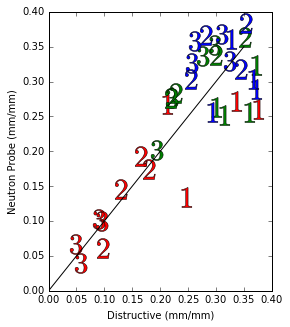

In [19]:
BDGraph, ax = plt.subplots(figsize = (4,5))
for plot in PlotList:
        mpos = 0
        col = clu.ix[VolumetricWC.ix[plot,'Zone'][0],'cols']
        for depth in ['0-20','20-40','40-60']:
            plt.plot(VolumetricWC.ix[(plot,depth),'VolumetricWC(mm/mm)'],VolumetricWC.ix[(plot,depth),'NPWC(mm/mm)'],marker=u'$'+Marker[mpos]+'$', color = col,ms=20)
            mpos+=1
plt.ylabel('Neutron Probe (mm/mm)')
plt.xlabel('Distructive (mm/mm)')
plt.legend(loc=2)
plt.plot([0,.35],[0,.35],'-',color='k')

In [20]:
VolumetricWC.ix[:,'Residual'] = VolumetricWC.ix[:,'VolumetricWC(mm/mm)'] - VolumetricWC.ix[:,'NPWC(mm/mm)']
VolumetricWC.ix[:,'RelResidual'] = VolumetricWC.ix[:,'Residual']/VolumetricWC.ix[:,'VolumetricWC(mm/mm)']

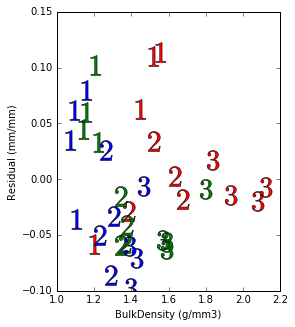

In [21]:
BDGraph, ax = plt.subplots(figsize = (4,5))
for plot in PlotList:
        mpos = 0
        col = clu.ix[VolumetricWC.ix[plot,'Zone'][0],'cols']
        for depth in ['0-20','20-40','40-60']:
            plt.plot(VolumetricWC.ix[(plot,depth),'BulkDensity(g/mm3)'],VolumetricWC.ix[(plot,depth),'Residual'],marker=u'$'+Marker[mpos]+'$', color = col,ms=20)
            mpos+=1
plt.ylabel('Residual (mm/mm)')
plt.xlabel('BulkDensity (g/mm3)')
plt.legend(loc=2)

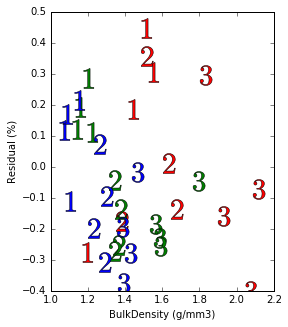

In [22]:
BDGraph, ax = plt.subplots(figsize = (4,5))
for plot in PlotList:
        mpos = 0
        col = clu.ix[VolumetricWC.ix[plot,'Zone'][0],'cols']
        for depth in ['0-20','20-40','40-60']:
            plt.plot(VolumetricWC.ix[(plot,depth),'BulkDensity(g/mm3)'],VolumetricWC.ix[(plot,depth),'RelResidual'],marker=u'$'+Marker[mpos]+'$', color = col,ms=20)
            mpos+=1
plt.ylabel('Residual (%)')
plt.xlabel('BulkDensity (g/mm3)')
plt.legend(loc=2)